# AUTHOR : 
# Amina Rahman K

# TASK 1: Prediction using Supervised ML
> Predict the percentage of a student based on the no. of study hours.
> - What will be predicted score if a student studies for 9.25 hrs/ day?

## Linear Regression
Linear Regression is a supervised machine learning algorithm which is used to predict continuous valued outputs from a labelled input.

It predicts a dependent variable based on the values of an independent variable.If there are more than 1 independent variable it is known as Multiple Linear Regression.

The parameters of linear regression are the intercept and the coefficient(s) (collectively symbolized as a theta vector) which are found using the OLS (Ordinary Least Squares) method.

# The Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Since we are only having 1 independent variable let's implement a simple linear regression using Python's scikit learn package.

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


We are dealing with the data of 25 students, on an average they study about 5 hours and score about 51.5 marks.
-  There is a huge difference between the time spent studying among the students as we can see that the minimum amount spent is 1 hr while the maximum amount spent is 9.2 hrs.

### In order to implement Linear Regression there must exist a linear relationship between the independent variable, x, and the dependent variable, y.Let's see if there any relatioship between the hours studied and marks scored.

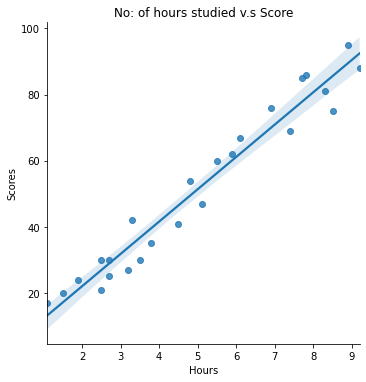

In [7]:
sns.lmplot(x='Hours',y='Scores',data=df)
plt.title('No: of hours studied v.s Score')
plt.show()

We can clearly see that there is a linear trend between Number of hours studied and scores, i.e as no:-of hours studied increases ,scores increases.

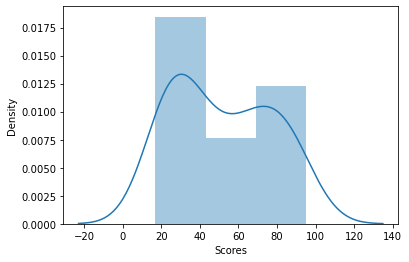

In [9]:
sns.distplot(df.Scores)
plt.show()

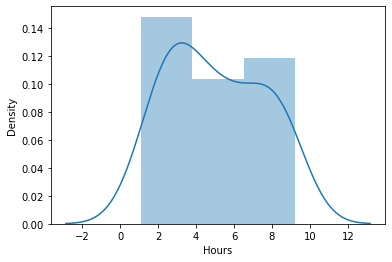

In [10]:
sns.distplot(df.Hours)
plt.show()

In [14]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

# TRAIN TEST SPLIT

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [8]:
X = df[['Hours']]
y = df.Scores

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [10]:
len(X_train),len(X_test)

(20, 5)

# Model Fitting

In [11]:
lm = LinearRegression()

In [12]:
lm.fit(X_train, y_train)

LinearRegression()

In [13]:
pd.DataFrame({'Actual Score':y_test,'Predicted Score':lm.predict(X_test)})

,Actual Score,Predicted Score
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


Lets now predict it for a new value

In [14]:
print('Coefficient of Hours is ',lm.coef_)
print('The intercept is',lm.intercept_)

Coefficient of Hours is  [9.91065648]
The intercept is 2.018160041434683


That is for each hour studied, there will be a 9.91065648 increase in the Scores.

For a person who studied 9.25 hours their Score will be equal to :
> line = lm.intercept_ + lm.coef_ x X

  > 2.018160041434683 + 9.91065648 x 9.25 = 93.69173248143468

In [20]:
# You can also test with your own data
hours = [[9.25]]
own_pred = lm.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {:.2f}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69


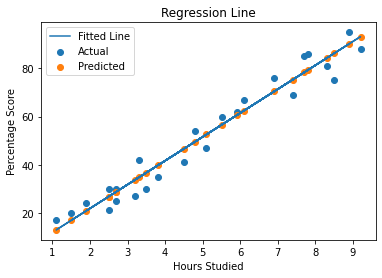

In [36]:
pred = lm.predict(df[['Hours']])
plt.scatter(df.Hours, df.Scores, label='Actual')
plt.title('Regression Line') 
plt.scatter(df.Hours, pred,label = 'Predicted')
plt.plot(df.Hours, pred,label = 'Fitted Line')
plt.legend()
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

In [38]:
residuals = df.Scores - pred
print(residuals.mean())
print(residuals.sum())

-0.21037032241357323
-5.259258060339336


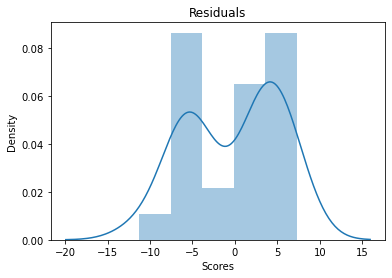

In [39]:
plt.title('Residuals')
sns.distplot(residuals,bins=5)
plt.show()

In [29]:
print('Accuracy score on training set is {:.2f}'.format(lm.score(X_train,y_train)))
print('Accuracy score on test set is {:.2f}'.format(lm.score(X_test,y_test)))

Accuracy score on training set is 0.95
Accuracy score on test set is 0.95


In [25]:
from sklearn.metrics import mean_squared_error,r2_score

In [26]:
print('MSE on training set {:.2f}'.format(mean_squared_error(y_test,lm.predict(X_test))))
print('MSE on test set {:.2f}'.format(mean_squared_error(y_train,lm.predict(X_train))))

MSE on training set 21.60
MSE on test set 30.90
